<a href="https://colab.research.google.com/github/maryamxasghari/Deep-Learning/blob/main/Project_NN__SVHN_Project_Learners_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project- Artificial Neural Networks: Street View Housing Number Digit Recognition

**Marks: 30**



Dear Learner,

Welcome to project on Classification using Artificial Neural Networks. We will work with the Street View Housing Numbers image dataset for this project work.

Do read the problem statement and the guidelines around the same.

----
### Context: 
-------

The ability to process visual information using machine learning algorithms can be very useful as demonstrated in various applications. The Street View House Numbers (SVHN) dataset is one of the most popular ones. It has been used in neural networks created by Google to read house numbers and match them to their geolocations. This is a great benchmark dataset to play with, learn and train models that accurately identify street numbers, and incorporate into all sorts of projects.

---------
### Objective:
------------
The objective of the exercise is to perform an image classification exercise on the given dataset to come up with a model that can help identify the digit images which have issues like picture brightness, blurriness. 

--------
### More about the dataset
------------
- The dataset is provided as a .h5 file. The basic preprocessing steps have been done.

---------------------------
### Guidelines
-----------------------------------------
- You need to download the dataset from the given link and add it to your drive. Use colab for this exercise. 
- You will need to mount the drive and give proper path to read the dataset.
- The exercise consists of semi written code blocks. You need to fill the blocks as per the instructions to achieve the required results.
- To be able to complete the assessment in the expected time, do not change the variable names. The codes might throw errors when the names are changed. 
- The marks of each requirement is mentioned in the question.
- You can raise your issues on the discussion forum on the Olympus.
- Uncomment the code snippets and work on them
--------------------------------------------
Wishing you all the best!





### Mount the drive
Let us start by mounting the drive.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Let us check for the version of installed tensorflow.

In [2]:
import tensorflow as tf
print(tf.__version__)

2.3.0


### Load the dataset
- Let us now, load the dataset that is available as a .h5 file.
- Split the data into train and the test dataset

In [3]:
import h5py
import numpy as np

# Open the file as readonly
# Make changes in path as required
h5f = h5py.File('/content/drive/My Drive/SVHN_single_grey1.h5', 'r')

# Load the training and the test set
X_train = h5f['X_train'][:]
y_train1 = h5f['y_train'][:]
X_test = h5f['X_test'][:]
y_test1 = h5f['y_test'][:]


# Close this file
h5f.close()

Let us import the required libraries now.

In [4]:
## Importing the required libraries
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

### Visualising images (3 marks)
- Use X_train to visualise the first 10 images. (2 marks)
- Use Y_train to print the first 10 labels (1 mark)

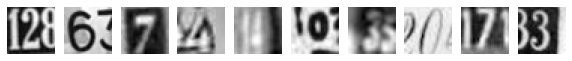

label for each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [5]:
# visualizing the first 10 images in the dataset and their labels


%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
for i in range(10):
     plt.subplot(1, 10, i+1)
     plt.imshow(X_train[i], cmap="gray")
     plt.axis('off')
plt.show()
print('label for each of the above image: %s' % (y_train1[0:10]))

### Data preparation (9 marks)

- Print the first image in the train image and figure out the shape of the images (1 mark)
- Reshape the train and the test dataset to flatten them. Figure out the required shape (3 marks)
- Normalise the train and the test dataset by dividing by 255. (2 mark)
- Print the new shapes of the train and the test set. (1 mark)
- One hot encode the target variables (2 marks)

Shape: (32, 32)

First image:
 AxesImage(54,36;334.8x217.44)


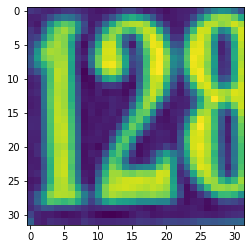

In [6]:
# Shape of the images and the first image

print("Shape:", X_train[0].shape)
print()
print("First image:\n", plt.imshow(X_train[0]))

In [7]:
# Reshaping the dataset to flatten them. Remember that we are trying to reshape the 2D image data into a 1D array

X_train = X_train.reshape(X_train.shape[0], 32*32)
X_test = X_test.reshape(X_test.shape[0], 32*32)

In [8]:
# Normalize inputs from 0-255 to 0-1

X_train = X_train/255
X_test =  X_test/255

In [9]:
# New shape 

print('Training set:', X_train.shape, y_train1.shape )
print('Test set:', X_test.shape, y_train1.shape )

Training set: (42000, 1024) (42000,)
Test set: (18000, 1024) (42000,)


In [10]:
import keras

In [11]:
# one hot encode output

y_train = keras.utils.to_categorical(y_train1)
y_test = keras.utils.to_categorical(y_test1)


### Model Building (13 marks)
- Write a function that returns a sequential model with the following architecture
 - First hidden layer with 256 nodes and relu activation
 - Second hidden layer with 64 nodes and relu activation 
 - Third hidden layer with 64 nodes and relu activation
 - 4th hidden layer with 32 nodes and relu activation
 - Output layer with softmax activation and no of nodes equal to the number of classes
- Compile the model with the categorical_crossentropy loss, adam optmizers (lr = 0.001) and accuracy metric
- do not fit the model here, just return the compiled model
- Call the model and fit on the train data with a validation split of 0.2, batch size = 128, verbose = 1 and 30 epochs. Store the model building history to use it later for visualisation.
- print the summary of the model 


In [13]:
# define model

from tensorflow.keras import losses
from tensorflow.keras import optimizers


def nn_model_1():
    # create model
    model = Sequential()  
    #add layers as per instructions above
    model.add(Dense(256,activation='relu'))
    model.add(Dense(64,activation='relu'))
    model.add(Dense(64,activation='relu'))
    model.add(Dense(32,activation='relu'))
    model.add(Dense(10, activation='softmax'))
    # Compile model
    adam = keras.optimizers.Adam(lr=1e-3)
    model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=['accuracy'])
    return model

In [14]:
# Build the model

# Call function here
model_1 = nn_model_1()

# Fit the model and store the history
history_model_1 = model_1.fit(X_train, y_train,
            epochs=30,validation_split=0.2,batch_size = 128,
            validation_data=(X_test, y_test),
            shuffle=True,
            verbose=1)

Epoch 1/30
263/263 [==============================] - 1s 4ms/step - loss: 2.2665 - accuracy: 0.1265 - val_loss: 2.2137 - val_accuracy: 0.1501
Epoch 2/30
263/263 [==============================] - 1s 4ms/step - loss: 2.0020 - accuracy: 0.2514 - val_loss: 1.7659 - val_accuracy: 0.3674
Epoch 3/30
263/263 [==============================] - 1s 4ms/step - loss: 1.6516 - accuracy: 0.4064 - val_loss: 1.5693 - val_accuracy: 0.4433
Epoch 4/30
263/263 [==============================] - 1s 4ms/step - loss: 1.4916 - accuracy: 0.4830 - val_loss: 1.3967 - val_accuracy: 0.5243
Epoch 5/30
263/263 [==============================] - 1s 4ms/step - loss: 1.3567 - accuracy: 0.5467 - val_loss: 1.3884 - val_accuracy: 0.5313
Epoch 6/30
263/263 [==============================] - 1s 4ms/step - loss: 1.2229 - accuracy: 0.6033 - val_loss: 1.1978 - val_accuracy: 0.6196
Epoch 7/30
263/263 [==============================] - 1s 4ms/step - loss: 1.1350 - accuracy: 0.6410 - val_loss: 1.1112 - val_accuracy: 0.6523
Epoch 

In [15]:
#model summary here
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               262400    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                330       
Total params: 285,418
Trainable params: 285,418
Non-trainable params: 0
_________________________________________________________________


### Plotting the validation and training accuracies (2 marks)

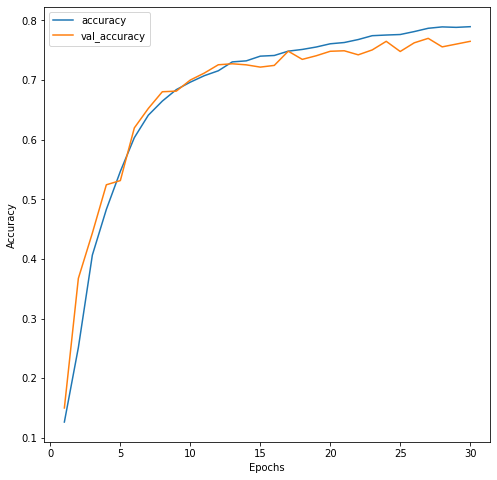

In [17]:
# plotting the accuracies

dict_hist = history_model_1.history
list_ep = [i for i in range(1,31)]

plt.figure(figsize = (8,8))
plt.plot(list_ep,dict_hist['accuracy'], label = 'accuracy')
plt.plot(list_ep,dict_hist['val_accuracy'], label = 'val_accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

** italicized textComments**
The model did good, there is some sign of oveffitting. the accuracy improved by increasing the number of Epochs but even the highest accuracy 0.17 is really low. 

### Test set prediction and final comments (3 marks)
- predict on the test set and comment on the resultls obtained. (3 marks)


In [18]:
# predict on the test dataset
test_pred = np.argmax(model_1.predict(X_test), axis  = 1)

#Print the classificatio report
from sklearn.metrics import classification_report
print(classification_report(y_test1, test_pred))



              precision    recall  f1-score   support

           0       0.82      0.78      0.80      1814
           1       0.78      0.80      0.79      1828
           2       0.80      0.79      0.79      1803
           3       0.74      0.69      0.72      1719
           4       0.79      0.83      0.81      1812
           5       0.69      0.73      0.71      1768
           6       0.69      0.80      0.74      1832
           7       0.86      0.79      0.82      1808
           8       0.70      0.71      0.71      1812
           9       0.80      0.72      0.75      1804

    accuracy                           0.76     18000
   macro avg       0.77      0.76      0.76     18000
weighted avg       0.77      0.76      0.76     18000



In [19]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test1, test_pred)

0.764



```
# This is formatted as code
```

#### Comments:
We got an accuracy score of 0.764 with the table above describing the class wise recall and precision.
We have to train different models with some changes to get a better result

.
